In [1]:
import pandas as pd
import numpy as np
w1 = pd.read_csv('/content/well 1.csv')
w2 = pd.read_csv('/content/well 2.csv')
w3 = pd.read_csv('/content/well 3.csv')
w4 = pd.read_csv('/content/well 4.csv')
w5 = pd.read_csv('/content/well 5.csv')
w6 = pd.read_csv('/content/well 6.csv')
w7 = pd.read_csv('/content/well 7.csv')
w8 = pd.read_csv('/content/well 8.csv')
data = pd.concat([w1,w2,w3,w4,w5,w6,w7,w8])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11494 entries, 0 to 1042
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DEPTH        11494 non-null  float64
 1   GR           11494 non-null  float64
 2   RHOB         11494 non-null  float64
 3   Vp           11494 non-null  float64
 4   Vsh          11494 non-null  float64
 5   Caliper      11494 non-null  float64
 6   Porosity     11494 non-null  float64
 7   Resistivity  11494 non-null  float64
 8   Stress       11494 non-null  float64
 9   PP           11494 non-null  float64
dtypes: float64(10)
memory usage: 987.8 KB


In [3]:
data.head()

,DEPTH,GR,RHOB,Vp,Vsh,Caliper,Porosity,Resistivity,Stress,PP
0,22.0024,57.3820,1.4506,1.4614,0.033808,11.4844,66.1596,0.7881,312783.4781,1609.0
1,22.1548,58.0070,1.4506,1.4594,0.044766,11.4844,66.1591,0.7751,314949.9782,1609.0
2,22.3072,59.1046,1.4506,1.4577,0.064012,11.4844,66.1585,0.7798,317116.4783,1609.0
3,22.4596,59.2124,1.4506,1.4567,0.065902,11.4844,66.1581,0.7711,319282.9784,1609.0
4,22.6120,59.8294,1.4506,1.4564,0.076721,11.4844,66.1575,0.7446,321449.4786,1609.0


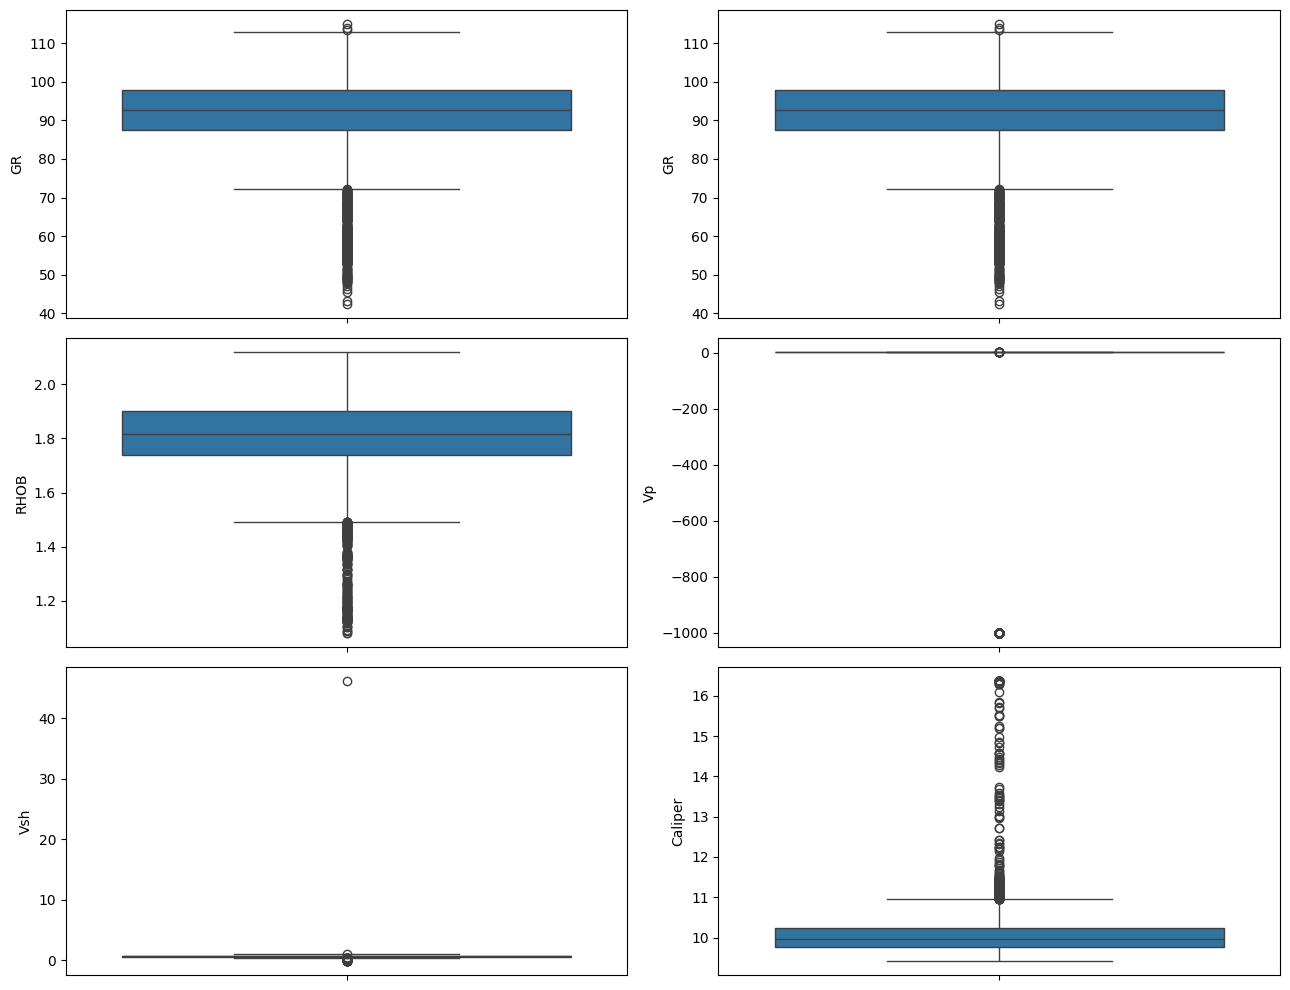

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(13,10))
plt.subplot(3,2,1)
sns.boxplot(data['GR'])
#plt.title('Before Outlier Removal', size=15)

plt.subplot(3,2,2)
sns.boxplot(data['GR'])
#plt.title('After Outlier Removal with Standard Deviation Filter', size=15)

plt.subplot(3,2,3)
sns.boxplot(data['RHOB'])
#plt.title('After Outlier Removal with Isolation Forest', size=15)

plt.subplot(3,2,4)
sns.boxplot(data['Vp'])
#plt.title('After Outlier Removal with Min. Covariance', size=15)

plt.subplot(3,2,5)
sns.boxplot(data['Vsh'])
#plt.title('After Outlier Removal with Local Outlier Factor', size=15)

plt.subplot(3,2,6)
sns.boxplot(data['Caliper'])
#plt.title('After Outlier Removal with One-class SVM', size=15)

plt.tight_layout()
plt.show()

Got outliers... see the dots we dont need those data

In [6]:
# GR
data['GR'][data['GR']<70]= np.nan
# RHOB
data['RHOB'][data['RHOB']<1.5] = np.nan
# Vp
data['Vp'][data['Vp']>1.70] = np.nan
# Vsh
data['Vsh'][data['Vsh']<0.37] = np.nan
# Caliper
data['Caliper'][data['Caliper']>11]= np.nan
# Porosity
data['Porosity'][data['Porosity']>75]= np.nan
# Resistivity
data['Resistivity'][data['Resistivity']>1.5]= np.nan

In [7]:
data.shape

(11494, 10)

In [9]:
data= data.dropna()

In [10]:
data.shape

(10408, 10)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
cols = ['GR','RHOB','Vp','Vsh','Caliper','Porosity','Resistivity','Stress']
scaled = scale.fit_transform(data[cols])
scaled_data = pd.DataFrame(scaled,columns=cols)
data = data.reset_index()
scaled_data

,GR,RHOB,Vp,Vsh,Caliper,Porosity,Resistivity,Stress
0,0.095351,0.087316,0.999789,0.002970,0.937192,0.726727,0.314069,0.017649
1,0.277994,0.098007,0.999792,0.187648,0.930059,0.804398,0.334395,0.018335
2,0.146424,0.144986,0.999797,0.230534,0.858793,0.764288,0.363338,0.023780
3,0.047101,0.162644,0.999799,0.173578,0.860497,0.803269,0.391064,0.024718
4,0.152046,0.136724,0.999803,0.194618,0.917498,0.804055,0.391907,0.025682
...,...,...,...,...,...,...,...,...
10403,0.785251,0.543010,0.999793,0.792334,0.335059,0.307047,0.641158,0.438688
10404,0.752223,0.525514,0.999783,0.760394,0.313344,0.405877,0.649401,0.436171
10405,0.738662,0.506561,0.999777,0.747281,0.258553,0.327461,0.659329,0.433404
10406,0.732966,0.477726,0.999770,0.741773,0.277238,0.356041,0.671132,0.428971


In [13]:
merge= [data['DEPTH'],data['PP'],scaled_data]
pd.concat(merge,axis=1)

,DEPTH,PP,GR,RHOB,Vp,Vsh,Caliper,Porosity,Resistivity,Stress
0,33.2800,1617.0,0.095351,0.087316,0.999789,0.002970,0.937192,0.726727,0.314069,0.017649
1,33.4324,1620.0,0.277994,0.098007,0.999792,0.187648,0.930059,0.804398,0.334395,0.018335
2,35.1088,1621.0,0.146424,0.144986,0.999797,0.230534,0.858793,0.764288,0.363338,0.023780
3,35.2612,1620.0,0.047101,0.162644,0.999799,0.173578,0.860497,0.803269,0.391064,0.024718
4,36.0232,1622.0,0.152046,0.136724,0.999803,0.194618,0.917498,0.804055,0.391907,0.025682
...,...,...,...,...,...,...,...,...,...,...
10403,181.3026,1805.0,0.785251,0.543010,0.999793,0.792334,0.335059,0.307047,0.641158,0.438688
10404,181.4550,1805.0,0.752223,0.525514,0.999783,0.760394,0.313344,0.405877,0.649401,0.436171
10405,181.6074,1803.0,0.738662,0.506561,0.999777,0.747281,0.258553,0.327461,0.659329,0.433404
10406,181.7598,1808.0,0.732966,0.477726,0.999770,0.741773,0.277238,0.356041,0.671132,0.428971


In [14]:
df_scaled= pd.concat(merge,axis=1)

In [15]:
from sklearn.model_selection import train_test_split
x = data.drop(['PP','DEPTH'],axis=1)
y = data['PP']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
x_train.shape

(8326, 9)

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [18]:
train_score = model.score(x_train, y_train)
print(f'Train score of trained model: {train_score*100}')
test_score = model.score(x_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 70.0863744609999
Test score of trained model: 69.8568496883291


In [19]:
print('Linear Model Coefficient (m): ', model.coef_)
print('Linear Model Coefficient (b): ', model.intercept_)

Linear Model Coefficient (m):  [-6.90512273e-01 -7.61399392e+00 -1.31337769e+02  9.23569930e-02
  5.77599648e+02 -4.88257211e+01 -2.22695704e+00  2.50259898e+02
  3.13288559e-04]
Linear Model Coefficient (b):  2504.629952426266


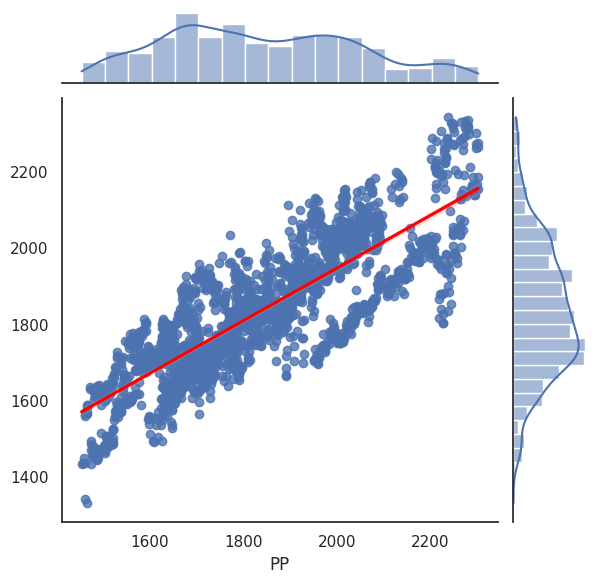

In [22]:
sns.set_theme(style="white")
sns.jointplot(x=y_test, y=pred, kind='reg', line_kws={"color": "red"})

In [23]:
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

k = x_test.shape[1]
n = len(x_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
MAPE = np.mean(np.abs( (y_test-pred) / y_test))*100
r2_linreg = r2_score(y_test, pred)
adj_r2 = 1-(1-r2_linreg) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, MAPE, r2_linreg, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'MAPE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

,Metric,Score
0,MSE,13074.199711
1,RMSE,114.342467
2,MAE,86.234139
3,MAPE,4.664126
4,r2,0.698568
5,adj_r2,0.697259


Ridge Regression

In [25]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.001)
ridge.fit(x_train, y_train)

pred = ridge.predict(x_test)

train_score = ridge.score(x_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = ridge.score(x_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 70.08637445446206
Test score of trained model: 69.85683777271683


In [26]:
k = x_test.shape[1]
n = len(x_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r2_ridge = r2_score(y_test, pred)
adj_r2 = 1-(1-r2_ridge) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, r2_ridge, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

,Metric,Score
0,MSE,13074.204879
1,RMSE,114.342489
2,MAE,86.233937
3,r2,0.698568
4,adj_r2,0.697259


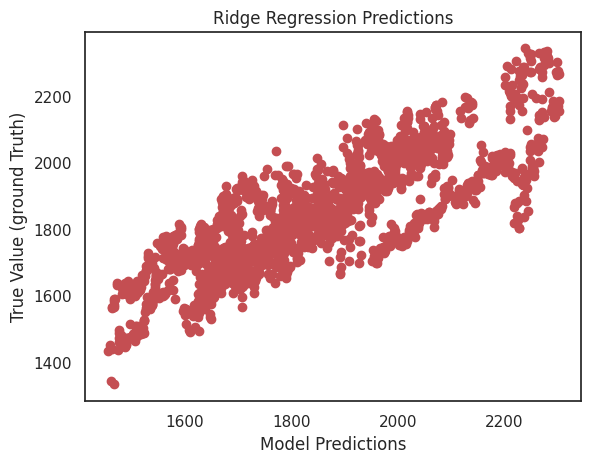

In [27]:
plt.plot(y_test, pred, "o", color = 'r')


plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Ridge Regression Predictions')
plt.show()

Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor

reg=RandomForestRegressor()

reg.fit(x_train, y_train)

RandomForestRegressor()

In [29]:
pred=reg.predict(x_test)

In [31]:
rf_acc=r2_score(y_test, pred)
print("R square",rf_acc)
print("Adusted R square", 1-(1-r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE", mean_absolute_error(y_test, pred))
print("MSE", mean_squared_error(y_test, pred))
print("RMSE",np.sqrt(mean_squared_error(y_test, pred)))

R square 0.9778484605188354
Adusted R square 0.9777522424419385
MAE 15.34740029586935
MSE 960.794237096281
RMSE 30.996681065821885


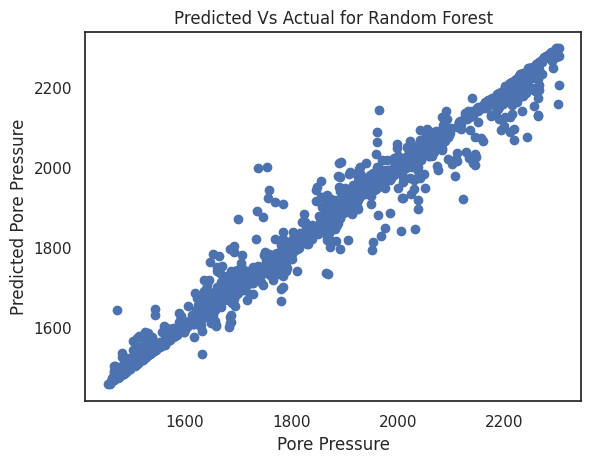

In [32]:
# visualize the difference between the actual and predicted price
plt.scatter(y_test, pred)
plt.xlabel("Pore Pressure")
plt.ylabel("Predicted Pore Pressure")
plt.title("Predicted Vs Actual for Random Forest")
plt.show()

XGB regressor

In [33]:
from xgboost import XGBRegressor

xreg=XGBRegressor()

xreg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [34]:
pred=xreg.predict(x_test)

In [35]:
xgb_acc=r2_score(y_test, pred)
print("R^2",rf_acc)
print("Adusted R^2", 1-(1-r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE", mean_absolute_error(y_test, pred))
print("MSE", mean_squared_error(y_test, pred))
print("RMSE",np.sqrt(mean_squared_error(y_test, pred)))

R^2 0.9778484605188354
Adusted R^2 0.9778564013679106
MAE 19.923640732037253
MSE 956.2960176440517
RMSE 30.924036244385235


SVM Regressor

In [36]:
from sklearn import svm

regg=svm.SVR()

In [37]:
regg.fit(x_train,y_train)

SVR()

In [38]:
pred=regg.predict(x_test)

In [39]:
regg_acc=r2_score(y_test, pred)
print("R^2",regg_acc)
print("Adusted R^2", 1-(1-r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE", mean_absolute_error(y_test, pred))
print("MSE", mean_squared_error(y_test, pred))
print("RMSE",np.sqrt(mean_squared_error(y_test, pred)))

R^2 0.488608133162588
Adusted R^2 0.4863868364436996
MAE 110.49917158944301
MSE 22180.95762477739
RMSE 148.93272852122664


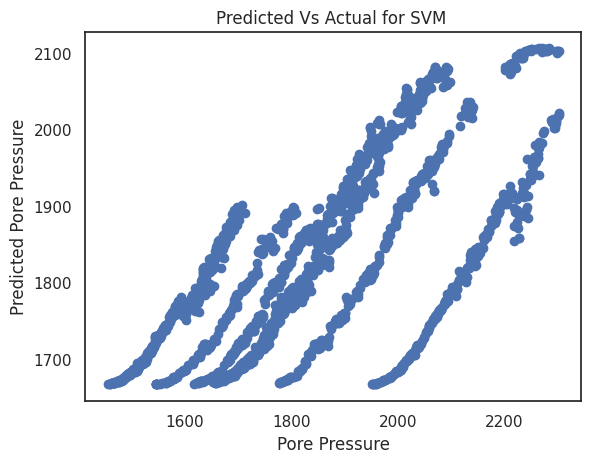

In [40]:
plt.scatter(y_test, pred)
plt.xlabel("Pore Pressure")
plt.ylabel("Predicted Pore Pressure")
plt.title("Predicted Vs Actual for SVM ")
plt.show()